<a href="https://colab.research.google.com/github/sandeeep-prajapati/pytorch_Practice_Repo/blob/main/besics/linerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#hyper-parametes
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [4]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

print(x_train.shape, y_train.shape)

(15, 1) (15, 1)


In [5]:
# creating model for linear regression
model = nn.Linear(input_size, output_size)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
model

Linear(in_features=1, out_features=1, bias=True)

In [12]:
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)
  output = model(inputs)
  loss = criterion(output,targets)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch+1) % 5 == 0:
        #torch.Tensor.item() : number
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 0.1807
Epoch [10/60], Loss: 0.1806
Epoch [15/60], Loss: 0.1806
Epoch [20/60], Loss: 0.1806
Epoch [25/60], Loss: 0.1806
Epoch [30/60], Loss: 0.1805
Epoch [35/60], Loss: 0.1805
Epoch [40/60], Loss: 0.1805
Epoch [45/60], Loss: 0.1804
Epoch [50/60], Loss: 0.1804
Epoch [55/60], Loss: 0.1804
Epoch [60/60], Loss: 0.1804


This code snippet performs the following steps:

1. **Model Prediction**:
   - `predicted = model(torch.from_numpy(x_train)).detach().numpy()`: This line passes the training data `x_train` through the trained model `model`.
   - `torch.from_numpy(x_train)` converts the numpy array `x_train` into a PyTorch tensor.
   - `model()` applies the trained model to the input data, resulting in predictions.
   - `detach()` is used to detach the tensor from the computational graph, preventing further tracking of gradients. This is typically done when you're only interested in the values and don't need gradients.
   - `numpy()` converts the tensor back to a numpy array. This is done because `matplotlib` functions typically expect numpy arrays rather than PyTorch tensors.

2. **Plotting**:
   - `plt.plot(x_train, y_train, 'ro', label='Original data')`: This line plots the original data points `(x_train, y_train)` on the graph as red circles (`'ro'`), with the label 'Original data'.
   - `plt.plot(x_train, predicted, label='fitted line')`: This line plots the predicted values (`predicted`) against the input values (`x_train`) on the graph. This represents the fitted line produced by the model. The `label` parameter is used to specify the label for this line.
   
3. **Legend and Display**:
   - `plt.legend()`: This function adds a legend to the plot, using the labels specified in the `plot` function calls.
   - `plt.show()`: This function displays the plot.

In summary, the code snippet takes the input data (`x_train`), passes it through a trained model (`model`), and then plots both the original data points and the predicted values on the same graph using `matplotlib`. This allows you to visually inspect how well the model fits the training data.

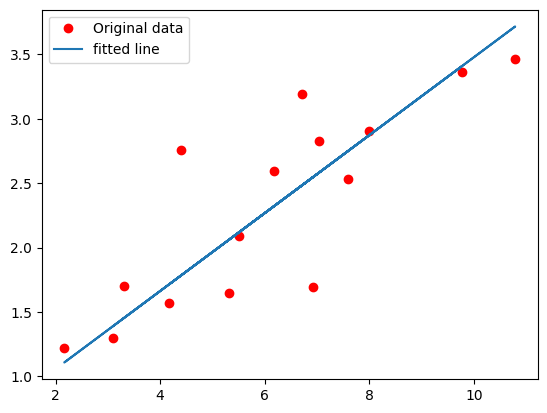

In [14]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train,y_train,'ro',label = 'Original data')
plt.plot(x_train,predicted, label = 'fitted line')
plt.legend()
plt.show()

torch.save(model.state_dict(), 'model.ckpt')